# Modeling and Simulation in Python

Chapter 10

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

### Under the hood

To get a `DataFrame` and a `Series`, I'll read the world population data and select a column.

`DataFrame` and `Series` contain a variable called `shape` that indicates the number of rows and columns.

DataFrame:
    - .shape : gives dimensions
    - .index : gives array of index values which labels rows
    - .columns : gives array of column values which label columns
            Change Column Names:
                table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 
                      'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']
            Change Column Types:
                for col in table1.columns:
                    table1[col] = pd.to_numeric(table1[col], errors='coerce')
                    
    - .values : gives array of values at all row by column positions
    

Series:
    - .name : name of the series
    - .index : array of index vales which label rows
    - .values : values of the series

In [3]:
filename = r"C:\Users\dcrai\source\repos\DATA604\data\World_population_estimates.html"
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
table2.shape

(67, 11)

In [4]:
type(table2)

pandas.core.frame.DataFrame

In [5]:
census = table2.census / 1e9
census.shape

(67,)

In [6]:
un = table2.un / 1e9
un.shape

(67,)

In [10]:
table2

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2012,7013871313,7.057075e+09,7.080072e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,7092128094,7.136796e+09,7.162119e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7169968185,7.238184e+09,7.243784e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A `DataFrame` contains `index`, which labels the rows.  It is an `Int64Index`, which is similar to a NumPy array.

In [7]:
table2.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

And `columns`, which labels the columns.

In [8]:
table2.columns

Index(['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj',
       'thomlinson', 'durand', 'clark'],
      dtype='object')

And `values`, which is an array of values.

In [9]:
table2.values

array([[2557628654, 2516000000.0, 2525149000.0, 2544000000.0,
        2527960000.0, 2400000000.0, 2527000000.0, 2500000000.0,
        2400000000.0, nan, 2486000000.0],
       [2594939877, nan, 2572850917.0, 2571663000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2636772306, nan, 2619292068.0, 2617949000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2682053389, nan, 2665865392.0, 2665959000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2730228104, nan, 2713172027.0, 2716927000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2782098943, nan, 2761650981.0, 2769074000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2835299673, nan, 2811572031.0, 2822502000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2891349717, nan, 2863042795.0, 2879934000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2948137248, nan, 2916030167.0, 2939254000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [3000716593, nan, 2970395814.0, 2995909000.0, nan

A `Series` does not have `columns`, but it does have `name`.

In [11]:
census.name

'census'

It contains `values`, which is an array.

In [12]:
census.values

array([2.55762865, 2.59493988, 2.63677231, 2.68205339, 2.7302281 ,
       2.78209894, 2.83529967, 2.89134972, 2.94813725, 3.00071659,
       3.04300151, 3.08396693, 3.14009322, 3.20982788, 3.28120131,
       3.35042579, 3.42067792, 3.49033371, 3.56231382, 3.63715905,
       3.71269774, 3.79032695, 3.86656865, 3.94209644, 4.01660881,
       4.08908323, 4.16018501, 4.23208458, 4.30410575, 4.37901394,
       4.45136274, 4.53441012, 4.61456656, 4.69573674, 4.77456939,
       4.8564627 , 4.94057123, 5.02720049, 5.11455717, 5.20144011,
       5.28895593, 5.37158592, 5.45613628, 5.53826832, 5.61868213,
       5.69920299, 5.77944059, 5.85797254, 5.93521325, 6.01207492,
       6.08857138, 6.16521925, 6.24201635, 6.31859096, 6.39569951,
       6.47304473, 6.55126353, 6.62991376, 6.70904978, 6.78821439,
       6.85858475, 6.93599949, 7.01387131, 7.09212809, 7.16996819,
       7.24789279, 7.32599671])

And it contains `index`:

In [13]:
census.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

If you ever wonder what kind of object a variable refers to, you can use the `type` function.  The result indicates what type the object is, and the module where that type is defined.

`DataFrame`, `Int64Index`, `Index`, and `Series` are defined by Pandas.

`ndarray` is defined by NumPy.

In [11]:
type(table2)

In [14]:
type(table2.index)

pandas.core.indexes.numeric.Int64Index

In [13]:
type(table2.columns)

In [14]:
type(table2.values)

In [15]:
type(census)

In [16]:
type(census.index)

In [17]:
type(census.values)

## Optional exercise

The following exercise provides a chance to practice what you have learned so far, and maybe develop a different growth model.  If you feel comfortable with what we have done so far, you might want to give it a try.

**Optional Exercise:** On the Wikipedia page about world population estimates, the first table contains estimates for prehistoric populations.  The following cells process this table and plot some of the results.

In [15]:
filename = r"C:\Users\dcrai\source\repos\DATA604\data\World_population_estimates.html"
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

6

In [16]:
type(tables)

list

Select `tables[1]`, which is the second table on the page.

In [17]:
table1 = tables[1]
table1.head()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[24],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


Not all agencies and researchers provided estimates for the same dates.  Again `NaN` is the special value that indicates missing data.

In [18]:
table1.tail()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
1913,NaN,NaN,1793.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.,1912.,NaN,NaN,NaN,NaN,NaN,1968.
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.,NaN,NaN,NaN,NaN,NaN,2145.
1940,NaN,2300.0,2299.,2307.,NaN,NaN,NaN,NaN,NaN,2340.


Again, we'll replace the long column names with more convenient abbreviations.

In [21]:
table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']

Some of the estimates are in a form Pandas doesn't recognize as numbers, but we can coerce them to be numeric.

In [22]:
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')

Here are the results.  Notice that we are working in millions now, not billions.

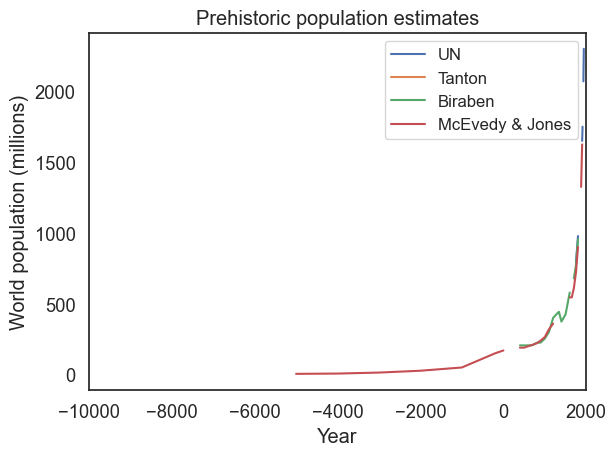

In [22]:
table1.plot()
decorate(xlim=[-10000, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistoric population estimates')
plt.legend(fontsize='small');

We can use `xlim` to zoom in on everything after Year 0.

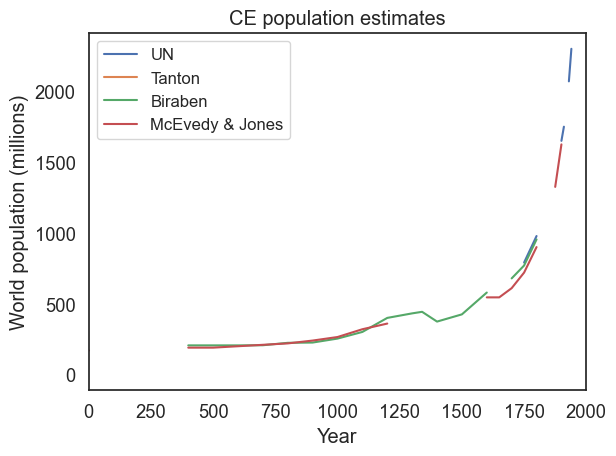

In [23]:
table1.plot()
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates')
plt.legend(fontsize='small');

See if you can find a model that fits these data well from Year 0 to 1950.

How well does your best model predict actual population growth from 1950 to the present?

Daniel Response: Using the code the professor gave us at the beginning of class, it doesn't look like any of our past models do a good job at predicting growth, so I'll use the model suggested in Chapter 10 of the book. I don't understand how the author found the model or in general how to create a model to abstract real world events to or what the purpose of this exercise is since I'm not sure how to find the best function to represent the data unless I'm using ARIMA models, Exp. Smoothing, or some regression and I don't think thats what we're supposed to do here.

In [142]:
index_value = '1633'
table1.loc[1900, 'Biraben']


array([ 255.,   nan,  256.,   nan,   nan,  206.,  206.,  206.,  207.,
        224.,  226.,  254.,  301.,  400.,  416.,  432.,  443.,  374.,
        425.,  579.,   nan,  679.,  770.,  954.,   nan, 1241.,   nan,
         nan, 1633.,   nan,   nan,   nan,   nan,   nan,   nan])

In [93]:

#Hard coding annual growth
bira=table1.loc[0:1950, 'Biraben']
bira=np.asarray(bira)
bira[-7]


ag=(bira[-7]-bira[0])/(29-1)

[ 255.   nan  256.   nan   nan  206.  206.  206.  207.  224.  226.  254.
  301.  400.  416.  432.  443.  374.  425.  579.   nan  679.  770.  954.
   nan 1241.   nan   nan 1633.   nan   nan   nan   nan   nan   nan]


1633.0

<Axes: title={'center': 'Biraben Prediction & Forecasts'}, xlabel='Year', ylabel='World Pop Millions'>

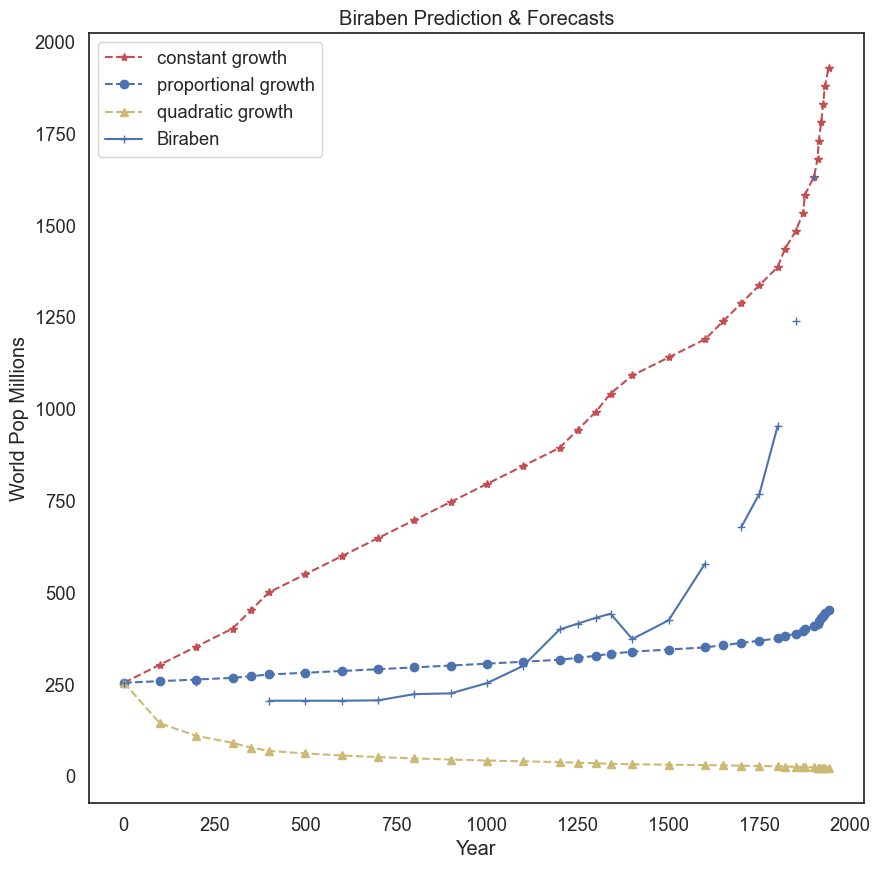

In [147]:

def run_sim(x, birth_rate, death_rate, alpha, beta,ag):
    results1, results2, results3, x = [], [], [], np.asarray(x)
    annual_growth=ag
    results1.append(x[0])
    results2.append(x[0])
    results3.append(x[0])
    for t in np.arange(1,len(x)):
        results1.append(results1[t-1] + annual_growth)
        results2.append(results2[t-1]+(birth_rate-death_rate)* results2[t-1])
        results3.append(results3[t-1]+ alpha*results3[t-1] + beta*results3[t-1]**2)
    x=pd.Series(x, index=table1.loc[0:1950,'Biraben'].index, name='Biraben')
    results1=pd.Series(results1, index=table1.loc[0:1950,'Biraben'].index, name='constant growth')
    results2=pd.Series(results2, index=table1.loc[0:1950,'Biraben'].index, name='proportional growth')
    results3=pd.Series(results3, index=table1.loc[0:1950,'Biraben'].index, name='quadratic growth')
    df=pd.concat([results1, results2, results3, x],axis=1)
    return df

a=run_sim(table1.loc[0:1950,'Biraben'], .027, .01,.025,-.0018, 49.214285)
a.plot(ylabel='World Pop Millions', title='Biraben Prediction & Forecasts', style=['r*--','bo--','y^--','b+-'], figsize=(10,10))



#table1.loc[0:, 'Biraben']
#table1.loc[400:, 'McEvedy & Jones']


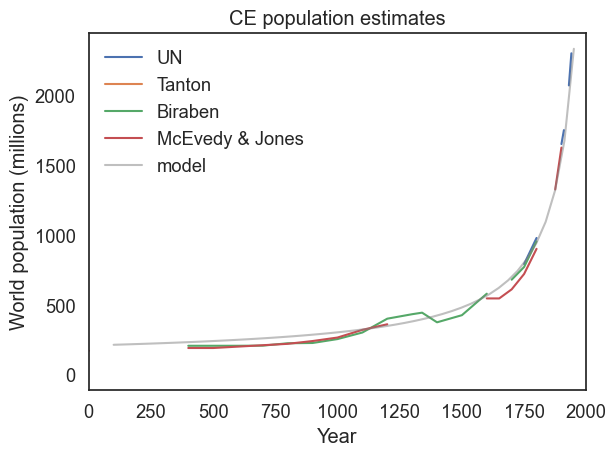

In [72]:
# Solution
# I made changes to show that its from 1950
# The function in book that found that best matches the data has the form
# a + b / (c - x)

# This function is hard to explain physically; that is, it doesn't
# correspond to a growth model that makes sense in terms of human 
# behavior.

# And it implies that the population goes to infinity in 2040.

from numpy import linspace
from matplotlib.pyplot import plot

xs = linspace(100, 1950)
ys = 110 + 200000 / (2040 - xs)
table1.plot()
plot(xs, ys, color='gray', alpha=0.5, label='model')

decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates')

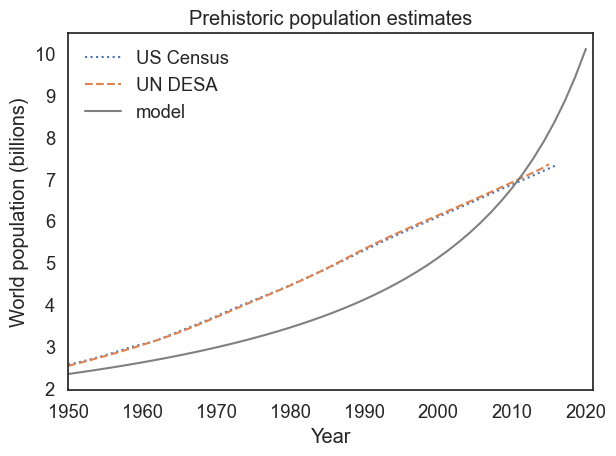

In [ ]:
# Solution

# Also it doesn't do a particularly good job of predicting
# actual growth from 1940 to the present.

plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')

xs = linspace(1950, 2020)
ys = 110 + 200000 / (2040 - xs)
plot(xs, ys/1000, color='gray', label='model')

decorate(xlim=[1950, 2021], xlabel='Year', 
         ylabel='World population (billions)',
         title='Prehistoric population estimates')